# Unit 2: Geometrical Vectors

### Defining vectors

In [74]:
%display latex

In [75]:
a=vector(QQ,[1,2,3])
b=vector(QQ,[-2,1,-1])
c=vector(QQ,[3,1,2])

### Vector addition, multiplication by a scalar

In [76]:
a+b

(-1, 3, 2)

In [77]:
3*b-2*c

(-12, 1, -7)

### Inner (Dot) Product

In [78]:
a.dot_product(b)

-3

### Angle between vectors

$$\cos\omega=\frac{\vec{a}\cdot\vec{\beta}}{|\vec{a}||\vec{b}|}$$

In [80]:
cw=a.dot_product(b)/(norm(a)*norm(b));cw  # This is cos(ω)

-1/28*sqrt(14)*sqrt(6)

In [81]:
n(arccos(cw))   # in radians

1.90426949904673

In [82]:
n(arccos(cw)*180/pi) # in degrees

109.106605350869

### Functions in sagemath

Sagemath functions

In [55]:
x,y=var('x,y')
f(x,y)=x^2-2*x*y

In [57]:
f(2,8)

-28

Python functions

In [59]:
def g(x,y):
    z=x^2
    w=2*x*y
    return z-w

In [60]:
g(2,8)

-28

### General Inner Product

In [12]:
A=matrix(QQ,[[3,1],[1,1]])


In [46]:
A.is_positive_definite()

True

In [13]:
def gen_iprod(a,b,A):
    return a*A*b

In [14]:
a=vector(QQ,[1,2])
b=vector(QQ,[-2,1])
gen_iprod(a,b,A)

-7

In [71]:
cta=gen_iprod(a,b,A)/sqrt(gen_iprod(a,a,A)*gen_iprod(b,b,A));cta  # this is cos(ω)

-7/33*sqrt(11)

In [72]:
n(arccos(cta)*180/pi) # ω in degrees

134.710622455170

### Visualise vectors

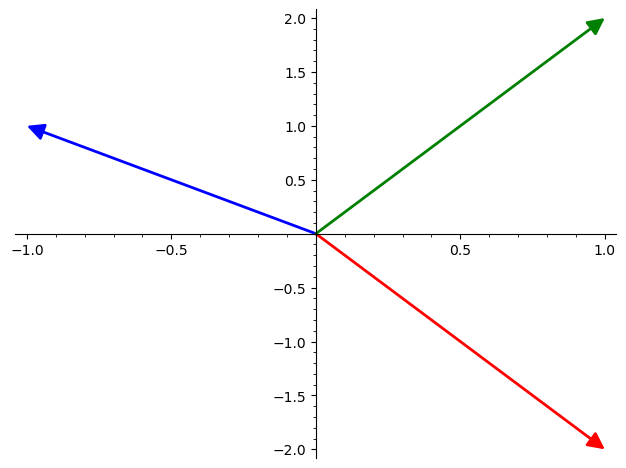

In [15]:
arrows= arrow((0,0),(1,-2), color = "red")+\
arrow((0,0),(-1,1), color = "blue")+\
arrow((0,0),(1,2), color = "green");arrows

### Orthogonal projections

#### Projection on a line

Example 1: Find the projection of the vector $x=[3,4,4]^T$ onto the line through the origin spanned by the vector  b = $[2,2,1]^T$. 

In [83]:
b = vector(QQ,[2,2,1])
x = vector(QQ,[3,4,4])

In [84]:
pix=(b.dot_product(x)/b.dot_product(b))*b;pix

(4, 4, 2)

In [ ]:
## Projection error

In [85]:
e=norm(x-pix);e

sqrt(5)

#### Projection on a plane

Example 2: Find the projection of the vector $x=[3,4,4]^T$ onto the plane spanned by   $a_1=[2,2,1]^T$, $a_2=[1,0,0]^T$. 

In [86]:
a1 = vector(QQ,[2,2,1])
a2 = vector(QQ,[1,0,0])
x= vector(QQ,[3,4,4])
B=column_matrix([a1,a2]);B

[2 1]
[2 0]
[1 0]

#### Projection matrix

In [87]:
P=B*(transpose(B)*B)^(-1)*transpose(B);P

[  1   0   0]
[  0 4/5 2/5]
[  0 2/5 1/5]

Projection of the vector $x$

In [88]:
px=P*x;px

(3, 24/5, 12/5)

Projection error

In [89]:
norm(x-px)

4*sqrt(1/5)

### Gram-Schmidt orthogonalization

In [37]:
# Non orthogonal basis
a1=vector(QQ,[2,1])
a2=vector(QQ,[1,3])
nobasis=column_matrix(QQ,[a1,a2])

In [38]:
# Check linear independence
M = RR^2
vecs = [([2,1]), ([1,3])]
M.are_linearly_dependent(vecs)

False

In [39]:
a1.dot_product(a1),a1.dot_product(a2),a2.dot_product(a2)

(5, 5, 10)

In [40]:
# Orthogonal basis
obasis, s = nobasis.gram_schmidt()
u1,u2=obasis

In [41]:
u1,u2

((2, 1), (-1, 2))

In [42]:
u1.dot_product(u2)

0

In [43]:
# Orthonormal basis
v1=u1/norm(u1);v2=u2/norm(u2)
v1,v2

((2/5*sqrt(5), 1/5*sqrt(5)), (-1/5*sqrt(5), 2/5*sqrt(5)))

In [117]:
v1.dot_product(v1),v1.dot_product(v2),v2.dot_product(v2)

(1, 0, 1)

## Rotations

In [46]:
R(t)=matrix(SR,[[cos(t),-sin(t)],[sin(t),cos(t)]])
a=vector(SR,[1,-1])

In [53]:
b=R(pi/3)*a;b

(1/2*sqrt(3) + 1/2, 1/2*sqrt(3) - 1/2)

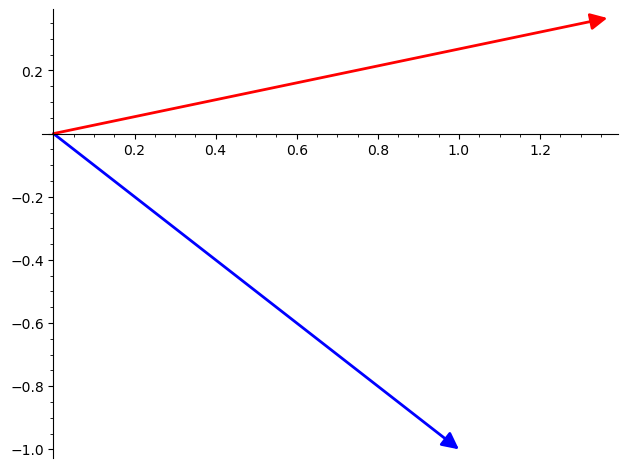

In [54]:
zero=vector(SR,[0,0])
arrow(zero,a)+arrow(zero,b,color='red')

## Quadratic forms

In [37]:
x,y=var('x,y')
X=vector(SR,[x,y])
A=matrix(SR,[[1,3],[3,4]])
(X*A*X).expand()

x^2 + 6*x*y + 4*y^2

### How to calculate $v v^T$

##### For a given $n$-dimensional vector $v$, the product $v^T v$ is a scalar, however,  the product $v v^T$ is an $n$ by $n$ dimensional matrix. Although <tt>sagemath</tt> can easity calculate the product \(A v\) or \(v A\) where $A$ is an $n$ by $n$  matrix without additional information, it has some diffuculties computing $v v^T$. To see this try

In [61]:
v=vector(QQ,[1,2])
v.parent()


Vector space of dimension 2 over Rational Field

In [62]:
(v.column()).parent()

Full MatrixSpace of 2 by 1 dense matrices over Rational Field

In [63]:
(v.row()).parent()

Full MatrixSpace of 1 by 2 dense matrices over Rational Field

Thus, to compute $v v^T$

In [64]:
(v.column())*(v.row())

[1 2]
[2 4]